In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("glass.csv")

In [6]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (214, 10)

Data types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

First 5 rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [8]:
print("\nClass distribution:\n", df['Type'].value_counts())



Class distribution:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Type', axis=1)
y = df['Type']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Logistic Regression 🔹
Accuracy: 0.7441860465116279
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.74        43
   macro avg       0.68      0.74      0.70        43
weighted avg       0.71      0.74      0.73        43


🔹 Random Forest 🔹
Accuracy: 0.7441860465116279
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.71      0.67      0.69        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [17]:
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

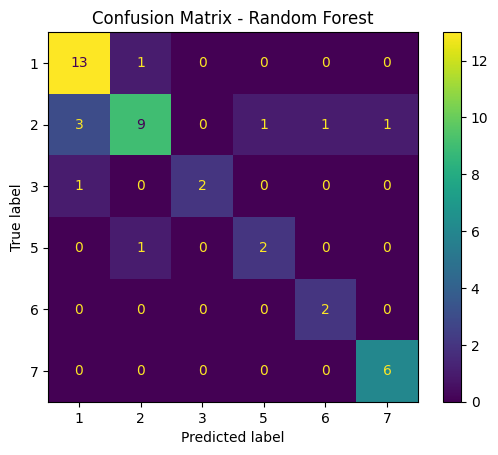

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [19]:
import joblib


In [20]:
joblib.dump(best_model, "glass_classifier.pkl")


['glass_classifier.pkl']

In [21]:
from google.colab import files
files.download("glass_classifier.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>